In [62]:
from functools import lru_cache
from os.path import dirname, join, isfile, splitext, split
from tools.files import *

import os
import os.path
import pandas as pd
import numpy as np
import glob
import wfdb
import sak
import math

from bokeh.io import curdoc
from bokeh.layouts import column, row, gridplot, layout
from bokeh.models import ColumnDataSource, PreText, Select, Slider, RangeSlider, Button,  Grid, LinearAxis, Plot, Quad
from bokeh.models.tools import HoverTool, WheelZoomTool, PanTool, CrosshairTool
from bokeh.plotting import figure


In [12]:
files = glob.glob('/media/guille/DADES/DADES/Delineator/SHAREEDB/*.dat')

In [58]:
file = np.random.choice(files)
fname,ext = os.path.splitext(file)
signal,header = wfdb.rdsamp(fname)

In [59]:
up_factor = 250./128.

In [51]:
leads = []
num_leads = []
fs = []

for file in files:
    header = wfdb.rdheader(fname)
    leads += header.sig_name
    num_leads.append(len(header.sig_name))
    fs.append(header.fs)

In [63]:
signal.shape

(9991808, 3)

In [65]:
tmp = sak.signal.interpolate.interp1d(signal.T,math.ceil(signal.shape[0]*up_factor)).T

In [15]:
StandardHeader = np.array(['I', 'II', 'III', 'AVR', 'AVL', 'AVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])

current_data = [{}]

# set up plots
source = ColumnDataSource(
    data=dict(
        sample=[], 
        I=[], I_returns=[],
        II=[], II_returns=[],
        III=[], III_returns=[],
        AVR=[], AVR_returns=[],
        AVL=[], AVL_returns=[],
        AVF=[], AVF_returns=[],
        V1=[], V1_returns=[],
        V2=[], V2_returns=[],
        V3=[], V3_returns=[],
        V4=[], V4_returns=[],
        V5=[], V5_returns=[],
        V6=[], V6_returns=[],
    )
)
source_static = ColumnDataSource(
    data=dict(
        sample=[], 
        I=[], I_returns=[],
        II=[], II_returns=[],
        III=[], III_returns=[],
        AVR=[], AVR_returns=[],
        AVL=[], AVL_returns=[],
        AVF=[], AVF_returns=[],
        V1=[], V1_returns=[],
        V2=[], V2_returns=[],
        V3=[], V3_returns=[],
        V4=[], V4_returns=[],
        V5=[], V5_returns=[],
        V6=[], V6_returns=[],
    )
)
tools = 'xbox_select,reset,ywheel_zoom,pan,box_zoom,undo,redo,save,crosshair,hover'

# set 2 leads
leads = [figure(plot_width=1500, plot_height=200, tools=tools, x_axis_type='auto', active_drag="xbox_select", name=lead) for i,lead in enumerate(StandardHeader)]
for i in range(StandardHeader.size):
    leads[i].line('sample', StandardHeader[i], line_width=1.5, source=source_static)
    leads[i].circle('sample', StandardHeader[i], size=1, source=source, color=None, selection_color="orange")
    leads[i].xaxis.visible = False
    leads[i].yaxis.visible = False
    if i != 0:
        leads[i].x_range = leads[0].x_range
        leads[i].y_range = leads[0].y_range

grid = gridplot(leads, ncols=1, toolbar_location='right')


In [79]:
import bokeh.io

In [74]:
boxes = []

from bokeh.models import BoxAnnotation
for lead in leads:
    boxes.append(BoxAnnotation(left=35,right=60, fill_alpha=0.05))
    lead.add_layout(boxes[-1])

In [84]:
document = curdoc()

In [90]:
b.left

35

In [19]:
import sak
import scipy as sp

# New segmentations
P = {}
QRS = {}
T = {}

for wave in ["P", "QRS", "T"]:
    wavedic = eval(wave)
    if isfile(f"./Zhejiang/{wave}.csv"):
        tmp = sak.load_data(f"./Zhejiang/{wave}.csv")
        for k in tmp:
            onoff = np.array(tmp[k])
            wavedic[k] = [[on,off] for (on,off) in zip(onoff[::2],onoff[1::2])]


In [17]:
new = "1000436"
basedir = '/home/guille/DADES/DADES/RubenDoste/'
down_factor = int(1000./250.)

In [20]:
# Load signal
signal = pd.read_csv(join(basedir,'ZhejiangDatabase','PVCVTECGData',f'{new}.csv'))

# Downsample signal to 250Hz (faster loading, etc)
signal = sp.signal.decimate(signal,down_factor,axis=0)

# Filter baseline wander
signal = sp.signal.filtfilt(*sp.signal.butter(4,   0.75/250., 'high'),signal.T).T


In [21]:
signal.shape

(2688, 12)

In [31]:
onoff = np.array(T[f"{new}###I"])//down_factor

In [42]:
onoff = onoff[filt_onoff,:]

In [69]:
filt_onoff.shape

(5,)

In [72]:
np.argwhere([1,1,1,0,0,0,0,1]).shape

(4, 1)

In [76]:
delete_locations = np.sort(np.argwhere(~filt_onoff)[:,0])[::-1].tolist()

In [61]:
aaa = T[f"{new}###I"]

In [79]:
for ix in delete_locations:
    aaa.pop(ix)

In [80]:
aaa

[[608, 1136], [3464, 3984], [6224, 6768], [9048, 9576]]

In [59]:
delete_locations

array([[4]])

In [57]:
np.argwhere(~filt_onoff).squeeze()

array(4)

In [55]:
np.delete_locations.squeeze()

array(4)

In [46]:
T[f"{new}###I"]

[[608, 1136], [3464, 3984], [6224, 6768], [9048, 9576], [11216, 11304]]

In [45]:
for on,off in onoff:
    print(on,off)
    print("")

152 284

866 996

1556 1692

2262 2394



In [21]:
import matplotlib.pyplot as plt

In [16]:
selected_pts = load_data('./SEGMENTATIONS.csv')

In [25]:
tmp = np.concatenate((np.arange(500,600),np.arange(1500,1600)))

In [39]:
get_on_off(mask)

(array([ 500, 1500]), array([ 600, 1600]))

In [30]:
mask = np.zeros((2000,),dtype=bool)
mask[tmp] = True

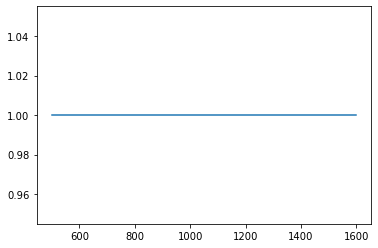

In [27]:
plt.plot(tmp,np.ones_like(tmp))

In [17]:
selected_pts

{'1-1-1': [7849, 8091],
 '2-1-1': [1613, 1835],
 '3-1-1': [19272, 19468],
 '4-1-1': [13343, 13493],
 '4-2-1': [2132, 2333],
 '5-1-1': [25948, 26155],
 '6-2-1': [11980, 12195],
 '7-1-1': [9440, 9662],
 '8-1-1': [25942, 26150],
 '9-1-1': [22042, 22286],
 '10-1-1': [19237, 19514],
 '12-1-1': [52153, 52359],
 '13-1-1': [15231, 15374],
 '14-1-1': [22493, 22682],
 '15-1-1': [19839, 20049],
 '16-1-1': [3510, 3693],
 '17-1-1': [17042, 17201],
 '18-1-1': [18195, 18433],
 '18-1-2': [37569, 37794],
 '19-1-1': [11857, 12100],
 '20-1-1': [18675, 18939],
 '21-1-1': [1295, 1475],
 '22-1-1': [38949, 39161],
 '23-1-1': [16340, 16563],
 '24-1-1': [3489, 3683],
 '25-1-1': [9177, 9378],
 '26-1-1': [2731, 2958],
 '27-1-1': [22312, 22540],
 '28-1-1': [9362, 9505],
 '29-1-1': [30358, 30527],
 '31-1-1': [16285, 16449],
 '32-1-1': [13223, 13340],
 '33-1-1': [11038, 11225],
 '34-1-1': [27079, 27264],
 '35-1-1': [14355, 14581],
 '36-1-1': [82537, 83018],
 '36-4-1': [4508, 4921],
 '39-1-1': [90121, 90450],
 '40-1

In [5]:
tmp = ColumnDataSource

In [13]:
tmp2 = [10,11,12,13,8,9,14,15]

In [15]:
np.sort(tmp2).tolist()

[8, 9, 10, 11, 12, 13, 14, 15]

In [9]:
tmp.data = pd.DataFrame(np.arange(1000))

In [12]:
type(tmp.data)

pandas.core.frame.DataFrame

In [3]:
import pandas as pd
import numpy as np

In [16]:
TemplateHeader = ['I', 'II', 'III', 'AVR', 'AVL', 'AVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']

In [21]:
data = pd.read_csv('/media/guille/DADES/DADES/SoONew/RETAG/100-1.txt', index_col=0,)

In [27]:
data['sample'] = np.arange(data.shape[0])

In [26]:
data.to_dict()

{'I': {0: -986.0,
  1: -982.0,
  2: -987.0,
  3: -1000.0,
  4: -1020.0,
  5: -1029.0,
  6: -1036.0,
  7: -1034.0,
  8: -1039.0,
  9: -1045.0,
  10: -1051.0,
  11: -1061.0,
  12: -1063.0,
  13: -1073.0,
  14: -1079.0,
  15: -1089.0,
  16: -1098.0,
  17: -1108.0,
  18: -1116.0,
  19: -1123.0,
  20: -1120.0,
  21: -1119.0,
  22: -1119.0,
  23: -1120.0,
  24: -1116.0,
  25: -1116.0,
  26: -1117.0,
  27: -1123.0,
  28: -1124.0,
  29: -1129.0,
  30: -1145.0,
  31: -1167.0,
  32: -1180.0,
  33: -1188.0,
  34: -1199.0,
  35: -1214.0,
  36: -1230.0,
  37: -1245.0,
  38: -1258.0,
  39: -1260.0,
  40: -1258.0,
  41: -1264.0,
  42: -1271.0,
  43: -1277.0,
  44: -1281.0,
  45: -1287.0,
  46: -1290.0,
  47: -1295.0,
  48: -1298.0,
  49: -1299.0,
  50: -1306.0,
  51: -1312.0,
  52: -1316.0,
  53: -1316.0,
  54: -1323.0,
  55: -1338.0,
  56: -1348.0,
  57: -1361.0,
  58: -1380.0,
  59: -1400.0,
  60: -1402.0,
  61: -1397.0,
  62: -1398.0,
  63: -1408.0,
  64: -1419.0,
  65: -1418.0,
  66: -1412.0,
  6

In [25]:
pd.concat([np.arange(data.shape[0]),data])

TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

In [4]:
''' Create a simple stocks correlation dashboard.
Choose stocks to compare in the drop down widgets, and make selections
on the plots to update the summary and histograms accordingly.
.. note::
    Running this example requires downloading sample data. See
    the included `README`_ for more information.
Use the ``bokeh serve`` command to run the example by executing:
    bokeh serve stocks
at your command prompt. Then navigate to the URL
    http://localhost:5006/stocks
.. _README: https://github.com/bokeh/bokeh/blob/master/examples/app/stocks/README.md
'''
from functools import lru_cache
from os.path import dirname, join

import pandas as pd

from bokeh.io import curdoc
from bokeh.layouts import column, row, gridplot
from bokeh.models import ColumnDataSource, PreText, Select, Slider
from bokeh.models.tools import HoverTool, WheelZoomTool, PanTool, CrosshairTool
from bokeh.plotting import figure

DATA_DIR = join(dirname('./BokehTest.ipynb'), 'daily')

DEFAULT_TICKERS = ['AAPL', 'GOOG', 'INTC', 'BRCM', 'YHOO']

def nix(val, lst):
    return [x for x in lst if x != val]

@lru_cache()
def get_data(t1):
    fname = join(DATA_DIR, 'table_%s.csv' % t1.lower())
    data = pd.read_csv(fname, header=None, parse_dates=['date'],
                       names=['date', 'foo', 'o', 'h', 'l', 'c', 'v'])
    data = data.set_index('date')
    df1 = pd.DataFrame({t1: data.c, t1+'_returns': data.c.diff()})
    df1 = df1.dropna()

    return pd.DataFrame({'t1': df1[t1], 't1_returns': df1[t1+'_returns']})

# set up widgets
stats = PreText(text='', width=500)
ticker1 = Select(value='AAPL', options=nix('AAPL',DEFAULT_TICKERS))

# set up plots
source = ColumnDataSource(data=dict(date=[], t1=[], t1_returns=[]))
source_static = ColumnDataSource(data=dict(date=[], t1=[], t1_returns=[]))
tools = 'xbox_select,reset,xwheel_zoom,ywheel_zoom'

# set 12 leads
leads = [figure(plot_width=1500, plot_height=80, tools=tools, x_axis_type='auto', active_drag="xbox_select") for i in range(12)]
for i in range(12):
    leads[i].line('date', 't1', line_width=1.5, source=source_static)
    leads[i].circle('date', 't1', size=1, source=source, color=None, selection_color="orange")
    leads[i].xaxis.visible = False
    leads[i].yaxis.visible = False

grid = gridplot(leads, ncols=1, toolbar_location=None)
slider = Slider(start=0.1, end=2, step=0.01, value=0.2)
slider.js_link('value', grid.glyph, 'radius')


AttributeError: 'GridBox' object has no attribute 'glyph'

In [ ]:
grid.